In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()  # for plot styling
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
#importing the dataset
data = pd.read_csv('movie_metadata1.csv')
data.shape
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,49,12,7.1,49.00,0


In [2]:
#data['director_facebook_likes']

In [3]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [4]:
newdata=data.iloc[:,4:6]
newdata[0:10]

,director_facebook_likes,actor_3_facebook_likes
0,0,855
1,563,1000
2,0,161
3,22000,23000
4,131,49
5,475,530
6,0,4000
7,15,284
8,0,19000
9,282,10000


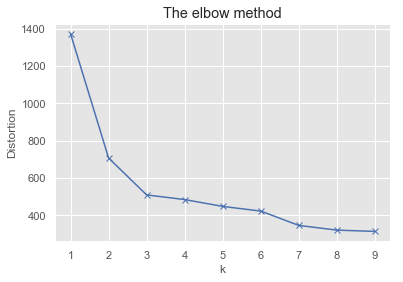

In [9]:
#Use Elbow to decide on the number of clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
X = np.array(list(zip(data['director_facebook_likes'].values, data['actor_3_facebook_likes'].values)))
colors = ['b','g','r']
markers = ['o','v','s']

distortions = []
K = range(1,10)
for k in K:
    KmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X,KmeanModel.cluster_centers_,'euclidean'),axis=1))/X.shape[0])
    
#plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The elbow method')
plt.show()

In [10]:
# Using the KMeans from sklearn

In [11]:
kmeans = KMeans(n_clusters=3)

In [12]:
kmeans.fit(newdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
kmeans.cluster_centers_
#print(len(kmeans.cluster_centers_))

array([[  151.29382199,   420.67350785],
       [14677.77777778,  1368.66666667],
       [  356.10227273, 11181.81818182]])

In [14]:
print (kmeans.labels_)
print (len(kmeans.labels_))

[0 0 0 ... 0 0 0]
5043


In [15]:
print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 4775, 1: 180, 2: 88}


/Users/shubhradeep/PycharmProjects/ReLearn/venv/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


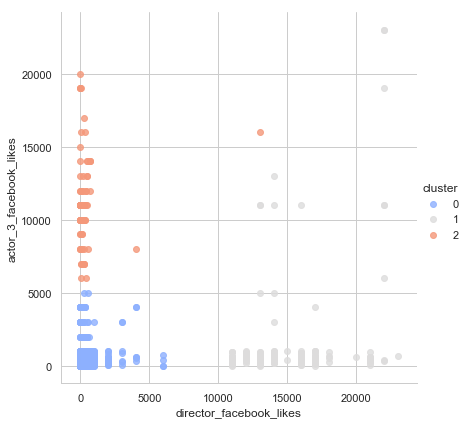

In [16]:
# plot the data 
newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('director_facebook_likes', 'actor_3_facebook_likes',data=newdata, hue='cluster',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)